In [272]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures



In [273]:
df=pd.read_csv("Desktop/dfw_data.csv")

In [274]:
df

,fiyat,genislik,toplam_hacim,yukseklik,derinlik
0,19.001 TL,70 cm,451-475 L,187 cm,72 cm
1,16.000 TL,70 cm,351-375 L,172 cm,65 cm
2,10.522 TL,55 cm,226-250 L,143 cm,55 cm
3,6.450 TL,45 cm,200 L ve altı,87 cm,52 cm
4,999 TL,31 cm,201-225 L,33 cm,30 cm ve altı
...,...,...,...,...,...
1195,56.775 TL,NaN,NaN,NaN,NaN
1196,40.000 TL,60 cm,326-350 L,191 cm,68 cm
1197,51.900 TL,70 cm,551-575 L,192 cm,74 cm
1198,25.999 TL,40 cm,200 L ve altı,57 cm,50 cm


In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   fiyat         1200 non-null   object
 1   genislik      1166 non-null   object
 2   toplam_hacim  1192 non-null   object
 3   yukseklik     1154 non-null   object
 4   derinlik      1179 non-null   object
dtypes: object(5)
memory usage: 47.0+ KB


In [276]:
df['fiyat'] = df['fiyat'].str.replace('.', '', regex=False)  
df['fiyat'] = df['fiyat'].str.replace(' TL', '', regex=False) 
df['fiyat'] = df['fiyat'].str.replace(',', '', regex=False) 
df['fiyat'] = pd.to_numeric(df['fiyat'])  

print(df)

      fiyat genislik   toplam_hacim yukseklik       derinlik
0     19001    70 cm      451-475 L    187 cm          72 cm
1     16000    70 cm      351-375 L    172 cm          65 cm
2     10522    55 cm      226-250 L    143 cm          55 cm
3      6450    45 cm  200 L ve altı     87 cm          52 cm
4       999    31 cm      201-225 L     33 cm  30 cm ve altı
...     ...      ...            ...       ...            ...
1195  56775      NaN            NaN       NaN            NaN
1196  40000    60 cm      326-350 L    191 cm          68 cm
1197  51900    70 cm      551-575 L    192 cm          74 cm
1198  25999    40 cm  200 L ve altı     57 cm          50 cm
1199  26900    41 cm  200 L ve altı     97 cm          48 cm

[1200 rows x 5 columns]


In [277]:
df['genislik'] = df['genislik'].str.replace('cm', '', regex=False)  
df['toplam_hacim'] = df['toplam_hacim'].str.replace('L', '', regex=False)  
df['yukseklik'] = df['yukseklik'].str.replace('cm', '', regex=False) 
df['derinlik'] = df['derinlik'].str.replace('cm', '', regex=False) 


In [278]:
df

,fiyat,genislik,toplam_hacim,yukseklik,derinlik
0,19001,70,451-475,187,72
1,16000,70,351-375,172,65
2,10522,55,226-250,143,55
3,6450,45,200 ve altı,87,52
4,999,31,201-225,33,30 ve altı
...,...,...,...,...,...
1195,56775,NaN,NaN,NaN,NaN
1196,40000,60,326-350,191,68
1197,51900,70,551-575,192,74
1198,25999,40,200 ve altı,57,50


In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   fiyat         1200 non-null   int64 
 1   genislik      1166 non-null   object
 2   toplam_hacim  1192 non-null   object
 3   yukseklik     1154 non-null   object
 4   derinlik      1179 non-null   object
dtypes: int64(1), object(4)
memory usage: 47.0+ KB


In [280]:

df['toplam_hacim'] = df['toplam_hacim'].str.replace('ve altı', '', regex=False) 
df['derinlik'] = df['derinlik'].str.replace('ve altı', '' ,regex=False) 


In [281]:
df

,fiyat,genislik,toplam_hacim,yukseklik,derinlik
0,19001,70,451-475,187,72
1,16000,70,351-375,172,65
2,10522,55,226-250,143,55
3,6450,45,200,87,52
4,999,31,201-225,33,30
...,...,...,...,...,...
1195,56775,NaN,NaN,NaN,NaN
1196,40000,60,326-350,191,68
1197,51900,70,551-575,192,74
1198,25999,40,200,57,50


In [282]:
df['toplam_hacim'] = pd.to_numeric(df['toplam_hacim'], errors='coerce').astype('Int64')
df['genislik'] = pd.to_numeric(df['genislik'], errors='coerce').astype('Int64')
df['yukseklik'] = pd.to_numeric(df['yukseklik'], errors='coerce').astype('Int64')
df['derinlik'] = pd.to_numeric(df['derinlik'], errors='coerce').astype('Int64')

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   fiyat         1200 non-null   int64
 1   genislik      1139 non-null   Int64
 2   toplam_hacim  92 non-null     Int64
 3   yukseklik     1131 non-null   Int64
 4   derinlik      1151 non-null   Int64
dtypes: Int64(4), int64(1)
memory usage: 51.7 KB


In [284]:
def calculate_average(value):
    if isinstance(value, str) and '-' in value:  # Değer bir string ve "-" içeriyorsa
        start, end = map(int, value.split('-'))  # "-" ile ayrılan iki sayıyı al
        return (start + end) / 2  # Ortalamasını hesapla
    return value  # Değer uygun değilse olduğu gibi bırak

df['toplam_hacim'] = df['toplam_hacim'].apply(calculate_average)

print(df)

      fiyat  genislik  toplam_hacim  yukseklik  derinlik
0     19001        70           NaN        187        72
1     16000        70           NaN        172        65
2     10522        55           NaN        143        55
3      6450        45         200.0         87        52
4       999        31           NaN         33        30
...     ...       ...           ...        ...       ...
1195  56775      <NA>           NaN       <NA>      <NA>
1196  40000        60           NaN        191        68
1197  51900        70           NaN        192        74
1198  25999        40         200.0         57        50
1199  26900        41         200.0         97        48

[1200 rows x 5 columns]


In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   fiyat         1200 non-null   int64  
 1   genislik      1139 non-null   Int64  
 2   toplam_hacim  92 non-null     float64
 3   yukseklik     1131 non-null   Int64  
 4   derinlik      1151 non-null   Int64  
dtypes: Int64(3), float64(1), int64(1)
memory usage: 50.5 KB


In [286]:
df

,fiyat,genislik,toplam_hacim,yukseklik,derinlik
0,19001,70,NaN,187,72
1,16000,70,NaN,172,65
2,10522,55,NaN,143,55
3,6450,45,200.0,87,52
4,999,31,NaN,33,30
...,...,...,...,...,...
1195,56775,<NA>,NaN,<NA>,<NA>
1196,40000,60,NaN,191,68
1197,51900,70,NaN,192,74
1198,25999,40,200.0,57,50


In [287]:
df = df.apply(lambda col: col.fillna(col.mean()) if col.dtypes in ['float64', 'int64'] else col, axis=0)

In [288]:
df

,fiyat,genislik,toplam_hacim,yukseklik,derinlik
0,19001,70,200.0,187,72
1,16000,70,200.0,172,65
2,10522,55,200.0,143,55
3,6450,45,200.0,87,52
4,999,31,200.0,33,30
...,...,...,...,...,...
1195,56775,<NA>,200.0,<NA>,<NA>
1196,40000,60,200.0,191,68
1197,51900,70,200.0,192,74
1198,25999,40,200.0,57,50


In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   fiyat         1200 non-null   int64  
 1   genislik      1139 non-null   Int64  
 2   toplam_hacim  1200 non-null   float64
 3   yukseklik     1131 non-null   Int64  
 4   derinlik      1151 non-null   Int64  
dtypes: Int64(3), float64(1), int64(1)
memory usage: 50.5 KB


In [290]:
df = df.apply(
    lambda col: col.fillna(col.mean()).round(0).astype('int') if col.dtypes in ['float64', 'int64'] else col
)

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   fiyat         1200 non-null   int32
 1   genislik      1139 non-null   Int64
 2   toplam_hacim  1200 non-null   int32
 3   yukseklik     1131 non-null   Int64
 4   derinlik      1151 non-null   Int64
dtypes: Int64(3), int32(2)
memory usage: 41.1 KB


In [292]:





# Belirtilen sütunlardaki sayısal olmayan değerleri filtreleyip NaN yap
cols_to_clean = ['genislik', 'derinlik', 'yukseklik']
for col in cols_to_clean:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Sayısal olmayan değerler NaN oldu; bu satırları sil
df = df.dropna(subset=cols_to_clean)

print(df)


      fiyat  genislik  toplam_hacim  yukseklik  derinlik
0     19001        70           200        187        72
1     16000        70           200        172        65
2     10522        55           200        143        55
3      6450        45           200         87        52
4       999        31           200         33        30
...     ...       ...           ...        ...       ...
1194  30999        59           200        186        66
1196  40000        60           200        191        68
1197  51900        70           200        192        74
1198  25999        40           200         57        50
1199  26900        41           200         97        48

[1128 rows x 5 columns]


In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1128 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   fiyat         1128 non-null   int32
 1   genislik      1128 non-null   Int64
 2   toplam_hacim  1128 non-null   int32
 3   yukseklik     1128 non-null   Int64
 4   derinlik      1128 non-null   Int64
dtypes: Int64(3), int32(2)
memory usage: 47.4 KB


In [294]:
df[['fiyat', 'toplam_hacim']] = df[['fiyat', 'toplam_hacim']].astype('int64')


In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1128 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   fiyat         1128 non-null   int64
 1   genislik      1128 non-null   Int64
 2   toplam_hacim  1128 non-null   int64
 3   yukseklik     1128 non-null   Int64
 4   derinlik      1128 non-null   Int64
dtypes: Int64(3), int64(2)
memory usage: 56.2 KB


In [296]:
# derinlik ve toplam_hacim sütunlarını sil
df = df.drop(['derinlik', 'toplam_hacim'], axis=1)

# Güncellenmiş DataFrame'i kontrol et
print(df.head())


   fiyat  genislik  yukseklik
0  19001        70        187
1  16000        70        172
2  10522        55        143
3   6450        45         87
4    999        31         33


In [297]:
x=df.drop("fiyat",axis=1)
y=df["fiyat"]

In [298]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [299]:
lr=LinearRegression()
model=lr.fit(x_train,y_train)
model.score(x_test,y_test)


-0.028865666620851327

In [300]:
y_pred = lr.predict(x_test)

In [301]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # Kök kare hata
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 661729.4333464183


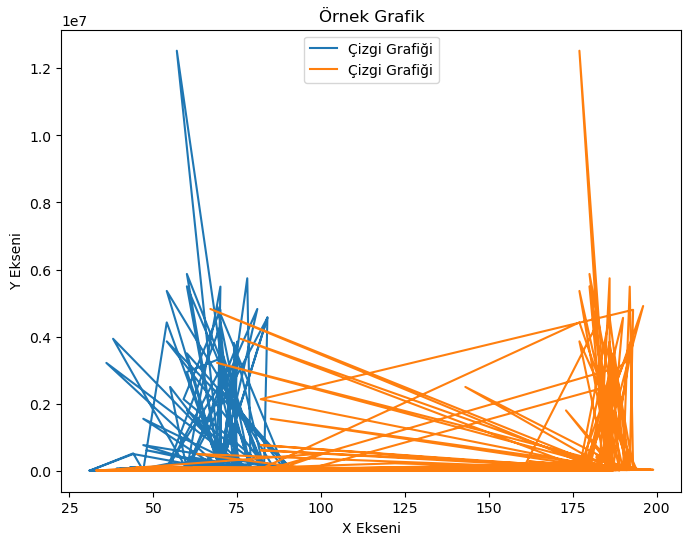

In [302]:
plt.figure(figsize=(8, 6))  # Şekil boyutunu ayarlıyoruz

# Verileri çiz
plt.plot(x, y, label='Çizgi Grafiği')

# Grafik için ek ayarlar
plt.xlabel('X Ekseni')
plt.ylabel('Y Ekseni')
plt.title('Örnek Grafik')
plt.legend()

# Grafiği göster
plt.show()

In [303]:
print(df.isnull().sum())  # Eksik değerleri kontrol edin


fiyat        0
genislik     0
yukseklik    0
dtype: int64


In [304]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [305]:
lr=LinearRegression()
model=lr.fit(x_train,y_train)
model.score(x_test,y_test)

-0.028865666620851327

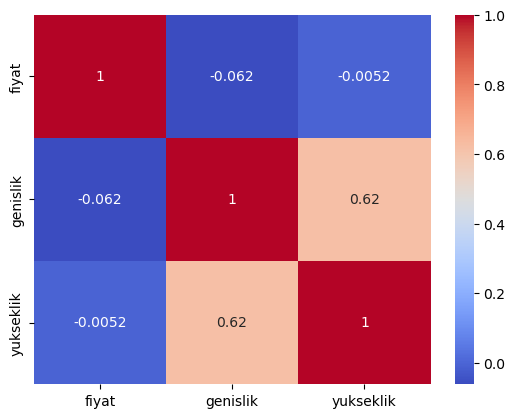

In [306]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [307]:


rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train, y_train)
print(rf_model.score(x_test, y_test))

0.041122024229732324


In [308]:


scores = cross_val_score(lr, x, y, cv=5, scoring='r2')
print(f"Cross-validated R^2: {scores.mean()}")


Cross-validated R^2: -0.07566224348741017


In [309]:


y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"MSE: {mse}, MAE: {mae}")


MSE: 437885842956.97186, MAE: 236833.82579938063


In [312]:
lr=LinearRegression()
model=lr.fit(x_train,y_train)
model.score(x_test,y_test)

-0.028865666620851327